# Task 2: Quantum error correction

In [113]:
!pip install qiskit
!pip install pylatexenc

In [114]:
%matplotlib inline

import matplotlib
import pylatexenc
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

## The original circuit

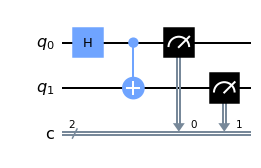

In [115]:
qc = QuantumCircuit(2, 2)
qc.h(0)  # add H gate
qc.cx(0, 1)  # added CNOT gate
qc.measure(range(2), range(2))  # Measure
qc.draw(output='mpl')


{'00': 496, '11': 528}


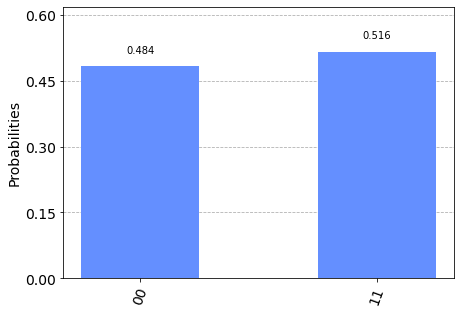

In [116]:
backend = Aer.get_backend('qasm_simulator') 
job = execute(qc, backend, shots=1024) 
result = job.result() 

counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

## Qubit flip protection

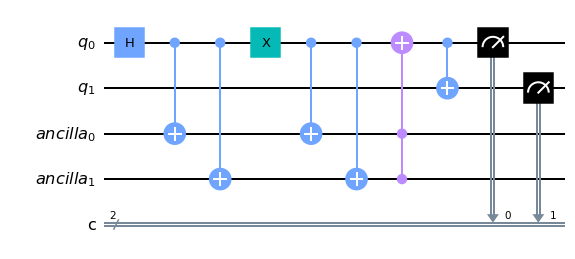

In [117]:
%matplotlib inline

import matplotlib
import pylatexenc
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

qr = QuantumRegister(2, 'q')
anc = QuantumRegister(2, 'ancilla')
cr = ClassicalRegister(2, 'c')

qc = QuantumCircuit(qr, anc, cr)

qc.h(qr[0])              # original part from the first circuit q0

qc.cx(qr[0], anc[0]) # error correction: first ancillary qubit flipped conditionaly on the value of qubit
qc.cx(qr[0], anc[1]) # error correction: second ancillary qubit flipped conditionaly on the value of qubit

###############

qc.x(qr[0]) # error circuit

###############

qc.cx(qr[0], anc[0]) # error correction: first ancillary qubit flipped conditionaly on the value of qubit
qc.cx(qr[0], anc[1]) # error correction: second ancillary qubit flipped conditionaly on the value of qubit

qc.mcx(list(range(2, 4)), 0)

qc.cx(0, 1)      # original part from the first circuit (qubit q1)

qc.measure(range(2), range(2))  # Measure



qc.draw(output='mpl')



{'00': 540, '11': 484}


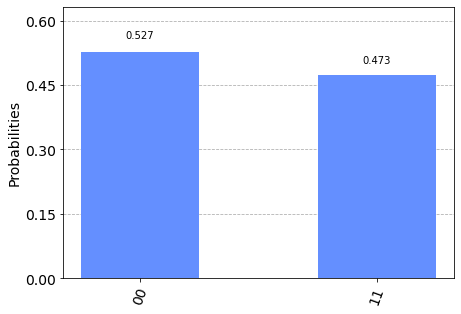

In [118]:

backend = Aer.get_backend('qasm_simulator') 
job = execute(qc, backend, shots=1024) 
result = job.result() 

counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)


## Qubit flip and Phase inversion protection (Shor's algorithm)


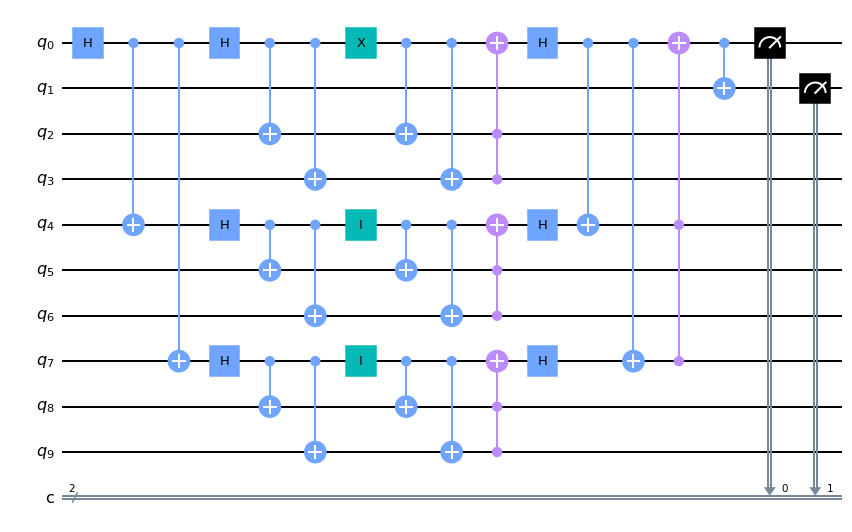

In [144]:
%matplotlib inline

import matplotlib
import pylatexenc
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

qr = QuantumRegister(10, 'q')
cr = ClassicalRegister(2, 'c')

qc = QuantumCircuit(qr, cr)

qc.h(qr[0])              # original part from the first circuit q0

qc.cx(qr[0], qr[4])  # phase inversion correction
qc.cx(qr[0], qr[7])  # phase inversion correction
qc.h(qr[0])          # phase inversion correction
qc.h(qr[4])          # phase inversion correction
qc.h(qr[7])          # phase inversion correction


n = 0
qc.cx(qr[n], qr[n + 2]) # qubit flip correction: second ancillary qubit flipped conditionaly on the value of qubit
qc.cx(qr[n], qr[n + 3]) # qubit flip correction: third ancillary qubit flipped conditionaly on the value of qubit

n = 4
qc.cx(qr[n], qr[n + 1]) # qubit flip correction: first ancillary qubit flipped conditionaly on the value of qubit
qc.cx(qr[n], qr[n + 2]) # qubit flip correction: second ancillary qubit flipped conditionaly on the value of qubit

n = 7
qc.cx(qr[n], qr[n + 1]) # qubit flip correction: first ancillary qubit flipped conditionaly on the value of qubit
qc.cx(qr[n], qr[n + 2]) # qubit flip correction: second ancillary qubit flipped conditionaly on the value of qubit


###############

n = 0
qc.i(qr[n]) # error circuit
#qc.x(qr[n]) # error circuit
#qc.z(qr[n]) # error circuit

n = 4
qc.i(qr[n]) # error circuit
#qc.x(qr[n]) # error circuit
#qc.z(qr[n]) # error circuit

n = 7
qc.i(qr[n]) # error circuit
#qc.x(qr[n]) # error circuit
#qc.z(qr[n]) # error circuit


###############

n = 0
qc.cx(qr[n], qr[n + 2]) # qubit flip correction: second ancillary qubit flipped conditionaly on the value of qubit
qc.cx(qr[n], qr[n + 3]) # qubit flip correction: third ancillary qubit flipped conditionaly on the value of qubit
qc.mcx(list(range(n + 2, n + 3 + 1)), n)  # qubit flip correction: toffoli gate

n = 4
qc.cx(qr[n], qr[n + 1]) # qubit flip correction: first ancillary qubit flipped conditionaly on the value of qubit
qc.cx(qr[n], qr[n + 2]) # qubit flip correction: second ancillary qubit flipped conditionaly on the value of qubit
qc.mcx(list(range(n + 1, n + 2 + 1)), n)  # qubit flip correction: toffoli gate

n = 7
qc.cx(qr[n], qr[n + 1]) # qubit flip correction: first ancillary qubit flipped conditionaly on the value of qubit
qc.cx(qr[n], qr[n + 2]) # qubit flip correction: second ancillary qubit flipped conditionaly on the value of qubit
qc.mcx(list(range(n + 1, n + 2 + 1)), n)  # qubit flip correction: toffoli gate

qc.h(qr[0])          # phase inversion correction
qc.h(qr[4])          # phase inversion correction
qc.h(qr[7])          # phase inversion correction

qc.cx(0, 4)      # phase inversion correction
qc.cx(0, 7)      # phase inversion correction
qc.mcx([4, 7], 0)  # phase inversion correction: toffoli gate

qc.cx(0, 1)      # original part from the first circuit (qubit q1)

qc.measure(range(2), range(2))  # Measure



qc.draw(output='mpl')

{'00': 506, '11': 518}


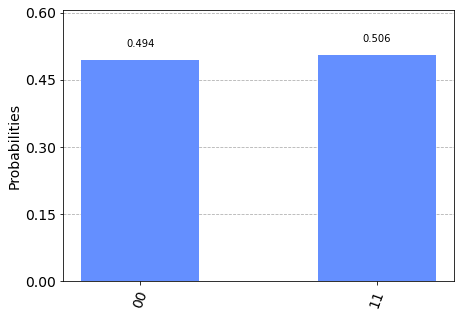

In [145]:
backend = Aer.get_backend('qasm_simulator') 
job = execute(qc, backend, shots=1024) 
result = job.result() 

counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

## The final code

In [138]:
%matplotlib inline

import matplotlib
import pylatexenc
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *
import random

num1 = random.uniform(0.0, 1.0)
circ = 0
if num1 > 1/3:
  if num1 < 2/3:
    circ = 4
  else:
    circ = 7
     
num2 = random.uniform(0.0, 1.0)
if num1 > 1/3:
  if num1 < 2/3:
    gate = 2
  else:
    gate = 3
else:
  gate = 1

print(num1)
print(circ)
print(num2)
print(gate)


0.7122433092857968
7
0.3049007827807523
3
